# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [82]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [159]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [160]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [161]:
df_data         

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [162]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [163]:
df_data.shape

(4324, 9)

In [164]:
df_data.isna().values.any()

True

In [165]:
df_data.duplicated().values.any()

False

In [166]:
df_data.duplicated().sum()

0

In [167]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [168]:
df_data = df_data.fillna(50)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [169]:
df_data_clean = df_data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)

In [170]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50,Success


## Descriptive Statistics

In [171]:
df_data_clean.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,4324,4324
unique,56,137,4319,4278,2,57,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,50,Success
freq,1777,235,2,6,3534,3360,3879


In [172]:
df_data_clean.iloc[1910:1920,5:6]

,Price
1910,50
1911,50
1912,50
1913,450.0
1914,50
1915,50
1916,"5,000.0"
1917,50
1918,50
1919,50


In [173]:
# string replace
df_data_clean.Price = df_data_clean.Price.astype(str).str.replace(',', "")
df_data_clean.iloc[1910:1920,5:6]

,Price
1910,50
1911,50
1912,50
1913,450.0
1914,50
1915,50
1916,5000.0
1917,50
1918,50
1919,50


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [174]:
num_lanches_per_org = df_data_clean.groupby('Organisation').agg({'Detail':'count'})
num_lanches_per_org

,Detail
Organisation,
AEB,3
AMBA,8
ASI,9
Arianespace,279
Arm??e de l'Air,4
Blue Origin,12
Boeing,136
CASC,251
CASIC,5


In [175]:
num_lanches_per_org_chart = px.bar(x = num_lanches_per_org.index,
               y = num_lanches_per_org.Detail,
               title='Number of Launches per Company',
                                  hover_name=num_lanches_per_org.index)
 
num_lanches_per_org_chart.update_layout(xaxis_title='Organisations', yaxis_title='Launches')
num_lanches_per_org_chart.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [176]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50,Success


In [177]:
active_vs_retired_org = df_data_clean.groupby(['Organisation','Rocket_Status'],as_index=False).agg({'Detail':'count'})
active_vs_retired_org

,Organisation,Rocket_Status,Detail
0,AEB,StatusActive,3
1,AMBA,StatusRetired,8
2,ASI,StatusRetired,9
3,Arianespace,StatusActive,114
4,Arianespace,StatusRetired,165
...,...,...,...
69,VKS RF,StatusActive,27
70,VKS RF,StatusRetired,174
71,Virgin Orbit,StatusActive,1
72,Yuzhmash,StatusRetired,2


In [178]:
active_vs_retired_org_chart = px.bar(active_vs_retired_org,
               x='Organisation',
               y='Detail',
               title='Number of Active versus Retired Rockets',
               color='Rocket_Status',
               barmode='group')
 
active_vs_retired_org_chart.update_layout(xaxis_title='Organisation',
                    yaxis_title='Active vs Retired',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
active_vs_retired_org_chart.show()

In [179]:
active_vs_retired = df_data_clean.groupby(['Rocket_Status'],as_index=True).agg({'Rocket_Status':'count'})
active_vs_retired

,Rocket_Status
Rocket_Status,
StatusActive,790
StatusRetired,3534


In [180]:
active_vs_retired_chart = px.pie(labels=active_vs_retired.index,names=active_vs_retired.index,values=active_vs_retired.Rocket_Status,title="Number of Active versus Retired Rockets")
            
active_vs_retired_chart.update_traces(textposition='outside', textinfo='percent+label')
 
active_vs_retired_chart.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [181]:
success_vs_failure_org = df_data.groupby(['Organisation','Mission_Status'],as_index=False).agg({'Detail':'count'})
success_vs_failure_org

,Organisation,Mission_Status,Detail
0,AEB,Failure,2
1,AEB,Prelaunch Failure,1
2,AMBA,Failure,3
3,AMBA,Partial Failure,1
4,AMBA,Success,4
...,...,...,...
114,VKS RF,Partial Failure,6
115,VKS RF,Success,188
116,Virgin Orbit,Failure,1
117,Yuzhmash,Success,2


In [182]:
success_vs_failure_org_chart = px.bar(success_vs_failure_org,
               x='Organisation',
               y='Detail',
               title='Number of Active versus Retired Rockets',
               color='Mission_Status',
               barmode='group')
 
success_vs_failure_org_chart.update_layout(xaxis_title='Organisation',
                    yaxis_title='Mission_Status',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
success_vs_failure_org_chart.show()

In [183]:
success_vs_failure = df_data_clean.groupby(['Mission_Status']).agg({'Mission_Status':'count'})
success_vs_failure

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


In [184]:
success_vs_failure_chart = px.pie(labels=success_vs_failure.index,names=success_vs_failure.index,values=success_vs_failure.Mission_Status,title="Number of Active versus Retired Rockets")
            
success_vs_failure_chart.update_traces(textposition='outside', textinfo='percent+label')
 
success_vs_failure_chart.show()

In [185]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           4324 non-null   object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [186]:
df_data_clean.Price =  pd.to_numeric(df_data_clean.Price)
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success


In [187]:
df_data_clean.Price.mean()

73.13961147086033

In [188]:
df_data_clean.iloc[1910:1920,5:6]

,Price
1910,50.00
1911,50.00
1912,50.00
1913,450.00
1914,50.00
1915,50.00
1916,"5,000.00"
1917,50.00
1918,50.00
1919,50.00


In [189]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

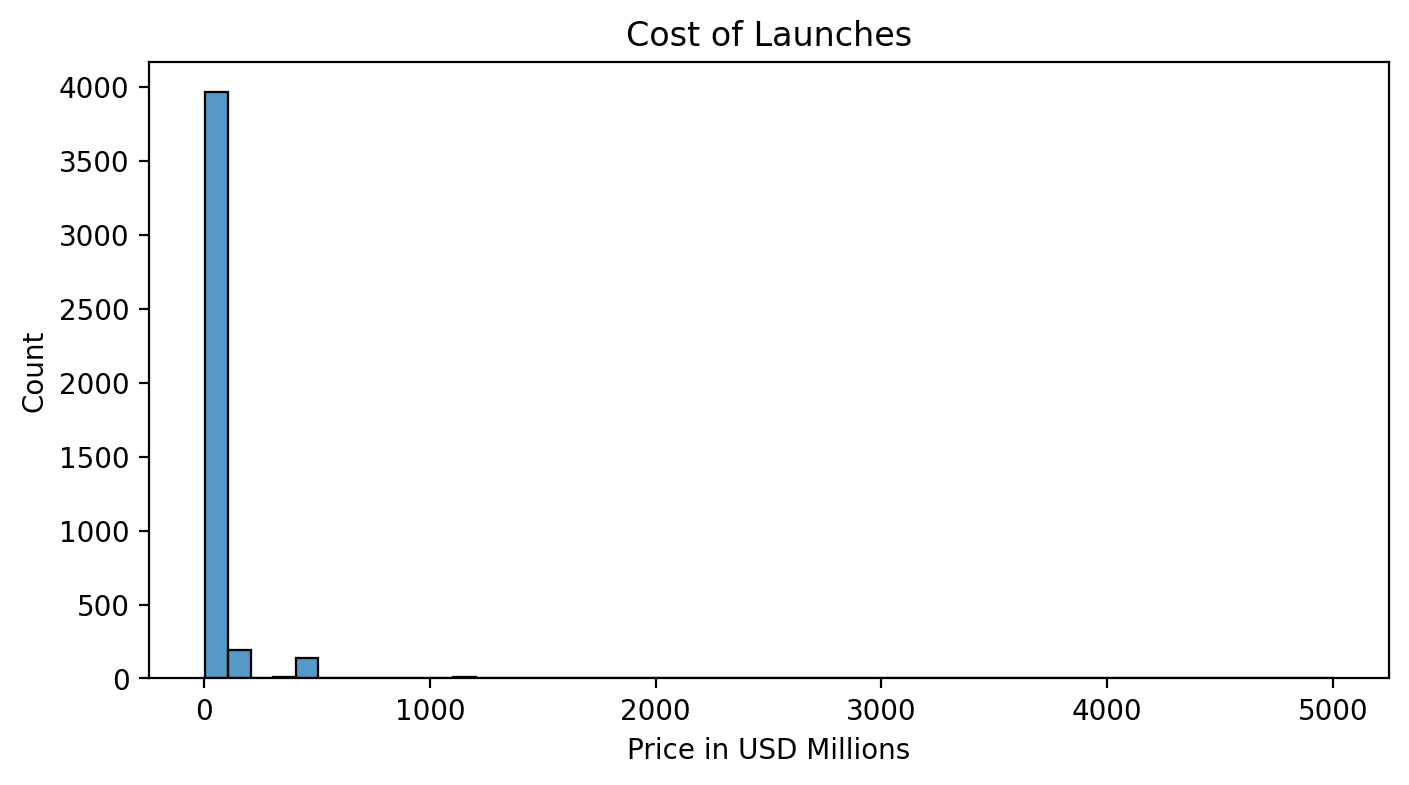

In [190]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df_data_clean,
             x=df_data_clean.Price,
             bins=50)
plt.xlabel('Price in USD Millions')
plt.title('Cost of Launches')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [191]:
# replcae non exit names
replaced_locations = []
for i in df_data_clean.Location:
    i = i.replace("Russia","Russian Federation")
    i = i.replace("New Mexico","USA")
    i = i.replace("Yellow Sea","China")
    i = i.replace("Shahrud Missile Test Site","Iran")
    i = i.replace("Pacific Missile Range Facility","USA")
    i = i.replace("Barents Sea","Russian Federation")
    i = i.replace("Gran Canaria","USA")
    i = i.replace("Pacific Ocean","USA")
    i = i.replace("North Korea","Korea,Democratic People's Republic nof")
    i = i.replace("South Korea","Korea,Republic sof")
    replaced_locations.append(i)
df_data_clean.Location = replaced_locations

In [192]:
df_data_clean.iloc[133:134,1:6]

,Location,Date,Detail,Rocket_Status,Price
133,"Tai Rui Barge, China","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.30


In [193]:
df_data_clean.iloc[956:957,1:6]

,Location,Date,Detail,Rocket_Status,Price
956,"LP Odyssey, Kiritimati Launch Area, USA","Thu Jun 23, 2005 14:02 UTC",Zenit-3 SL | Intelsat-Americas 8,StatusActive,50.00


In [194]:
df_data_clean.iloc[557:558,1:6]

,Location,Date,Detail,Rocket_Status,Price
557,"LA-Y1, Tanegashima Space Center, Japan","Sat May 24, 2014 03:05 UTC","H-IIA 202 | Daichi 2, SPROUT & Others",StatusActive,90.00


In [195]:
# using pycountry getting all country names
country_names_all = []
for i in list(pycountry.countries):
    country_names_all.append(i.name)
country_names_all

['Aruba',
 'Afghanistan',
 'Angola',
 'Anguilla',
 'Åland Islands',
 'Albania',
 'Andorra',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antarctica',
 'French Southern Territories',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Bonaire, Sint Eustatius and Saba',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas',
 'Bosnia and Herzegovina',
 'Saint Barthélemy',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia, Plurinational State of',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Bouvet Island',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Cocos (Keeling) Islands',
 'Switzerland',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Congo, The Democratic Republic of the',
 'Congo',
 'Cook Islands',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Christmas Island',
 'Cayman Islands',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica'

In [196]:
# Getting country names from locations

# create a list of all locations
country_names_list = []
for i in df_data_clean.Location:
    a = i.split()
    country_names_list.append(a)

# iterae the list and append the last index
country_names = []
for i in country_names_list:
    for j in i:
        if j in country_names_all:
           pass
        else:
           pass
    country_names.append(j)


# update few country names to proper
country_names_updated = []
for i in country_names:
    i = i.replace("Zealand","New Zealand")
    i = i.replace("Federation","Russian Federation")
    i = i.replace("Iran","Iran, Islamic Republic of")
    i = i.replace("nof","Korea, Democratic People's Republic of")
    i = i.replace("sof","Korea, Republic of")
    country_names_updated.append(i)

country_names_updated

['USA',
 'China',
 'USA',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'China',
 'USA',
 'Japan',
 'USA',
 'China',
 'China',
 'Israel',
 'China',
 'New Zealand',
 'China',
 'USA',
 'China',
 'China',
 'USA',
 'New Zealand',
 'China',
 'USA',
 'China',
 'USA',
 'China',
 'USA',
 'Russian Federation',
 'Japan',
 'USA',
 'China',
 'China',
 'Kazakhstan',
 'USA',
 'Iran, Islamic Republic of',
 'China',
 'Kazakhstan',
 'USA',
 'China',
 'Kazakhstan',
 'USA',
 'Russian Federation',
 'China',
 'China',
 'USA',
 'Russian Federation',
 'China',
 'France',
 'USA',
 'USA',
 'USA',
 'Iran, Islamic Republic of',
 'Japan',
 'Kazakhstan',
 'New Zealand',
 'USA',
 'USA',
 'France',
 'China',
 'China',
 'China',
 'USA',
 'China',
 'Russian Federation',
 'Kazakhstan',
 'USA',
 'China',
 'France',
 'USA',
 'China',
 'USA',
 'India',
 'Russian Federation',
 'China',
 'China',
 'Kazakhstan',
 'New Zealand',
 'USA',
 'China',
 'India',
 'France',
 'Russian Federation',
 'China',
 'China',
 'China',
 'C

In [197]:
#create codes from iso
country_codes = []
for i in country_names_updated:
    try:
        b = countries.get(i)
        country_codes.append(b.alpha3)
    except KeyError:
        country_codes.append("Unknown")
country_codes

['USA',
 'CHN',
 'USA',
 'KAZ',
 'USA',
 'CHN',
 'KAZ',
 'CHN',
 'USA',
 'JPN',
 'USA',
 'CHN',
 'CHN',
 'ISR',
 'CHN',
 'NZL',
 'CHN',
 'USA',
 'CHN',
 'CHN',
 'USA',
 'NZL',
 'CHN',
 'USA',
 'CHN',
 'USA',
 'CHN',
 'USA',
 'RUS',
 'JPN',
 'USA',
 'CHN',
 'CHN',
 'KAZ',
 'USA',
 'IRN',
 'CHN',
 'KAZ',
 'USA',
 'CHN',
 'KAZ',
 'USA',
 'RUS',
 'CHN',
 'CHN',
 'USA',
 'RUS',
 'CHN',
 'FRA',
 'USA',
 'USA',
 'USA',
 'IRN',
 'JPN',
 'KAZ',
 'NZL',
 'USA',
 'USA',
 'FRA',
 'CHN',
 'CHN',
 'CHN',
 'USA',
 'CHN',
 'RUS',
 'KAZ',
 'USA',
 'CHN',
 'FRA',
 'USA',
 'CHN',
 'USA',
 'IND',
 'RUS',
 'CHN',
 'CHN',
 'KAZ',
 'NZL',
 'USA',
 'CHN',
 'IND',
 'FRA',
 'RUS',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'USA',
 'CHN',
 'CHN',
 'USA',
 'USA',
 'CHN',
 'NZL',
 'USA',
 'KAZ',
 'CHN',
 'RUS',
 'KAZ',
 'CHN',
 'JPN',
 'CHN',
 'CHN',
 'CHN',
 'CHN',
 'RUS',
 'IRN',
 'USA',
 'KAZ',
 'NZL',
 'CHN',
 'CHN',
 'USA',
 'USA',
 'FRA',
 'KAZ',
 'KAZ',
 'RUS',
 'CHN',
 'USA',
 'CHN',
 'IND',
 'KAZ',
 'KAZ',
 'FRA',


In [198]:
df_data_clean["Country_Codes"] = country_codes

In [199]:
df_data_clean["Country_Names"] = country_names_updated

In [200]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan


In [201]:
number_of_launches = df_data_clean.groupby(["Country_Names","Country_Codes"],as_index=False).agg({"Mission_Status":"count"})
number_of_launches

,Country_Names,Country_Codes,Mission_Status
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76
5,"Iran, Islamic Republic of",IRN,14
6,Israel,ISR,11
7,Japan,JPN,126
8,Kazakhstan,KAZ,701
9,Kenya,KEN,9


In [202]:
fig = px.choropleth(locations=number_of_launches.Country_Codes,color=number_of_launches.Mission_Status,hover_name=number_of_launches.Country_Names,
                   color_continuous_scale=px.colors.sequential.matter,title="Number of Launches by Country")
fig.update_layout(coloraxis_showscale=True)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [203]:
number_of_launch_failures = df_data_clean[df_data_clean.Mission_Status != "Success"]
number_of_launch_failures        

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN,China
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL,New Zealand
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,China
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,50.00,Failure,CHN,China
...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,50.00,Failure,USA,USA
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,50.00,Failure,KAZ,Kazakhstan
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,50.00,Failure,USA,USA
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA


In [204]:
no_of_failures = number_of_launch_failures.groupby(["Country_Names","Country_Codes"],as_index=False).agg({"Mission_Status":"count"})
no_of_failures

,Country_Names,Country_Codes,Mission_Status
0,Australia,AUS,3
1,Brazil,BRA,3
2,China,CHN,25
3,France,FRA,18
4,India,IND,13
5,"Iran, Islamic Republic of",IRN,9
6,Israel,ISR,2
7,Japan,JPN,13
8,Kazakhstan,KAZ,93
9,"Korea, Democratic People's Republic of",PRK,3


In [205]:
fig = px.choropleth(locations=no_of_failures.Country_Codes,color=no_of_failures.Mission_Status,hover_name=no_of_failures.Country_Names,
                   color_continuous_scale=px.colors.sequential.matter,title="Number of Launch Failures by Country")
fig.update_layout(coloraxis_showscale=True)
fig.show()

In [206]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [207]:
sun_burn = df_data_clean.groupby(["Country_Names","Organisation","Mission_Status"],as_index=False).agg({"Country_Codes":"count"})
sun_burn

,Country_Names,Organisation,Mission_Status,Country_Codes
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [208]:
fig = px.sunburst(path=[sun_burn.Country_Names,sun_burn.Organisation,sun_burn.Mission_Status], values=sun_burn.Country_Codes)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [209]:
money_spent_by_org = df_data_clean.groupby(["Organisation"],as_index=False).agg({"Price":"sum"})
money_spent_by_org.sort_values("Price")

,Organisation,Price
53,Virgin Orbit,12.00
44,Sandia,15.00
12,EER,20.00
27,Khrunichev,50.00
47,Starsem,50.00
38,OneSpace,50.00
30,Landspace,50.00
20,IRGC,50.00
11,Douglas,50.00
55,i-Space,50.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [210]:
money_spent_by_org_per_launch = df_data_clean.groupby(["Organisation","Detail"],as_index=False).agg({"Price":"sum"})
money_spent_by_org_per_launch.sort_values("Price")

,Organisation,Detail,Price
467,CASC,"Long March 11 | Jilin-1 07, 08 & Others",5.30
472,CASC,Long March 11 | Zhuhai-1 2A to 2D,5.30
471,CASC,"Long March 11 | XPNAV 1, Xiaoxiang 1 & Others",5.30
470,CASC,Long March 11 | XJS-G and XJS-H,5.30
469,CASC,Long March 11 | Pujian 1 & Others,5.30
...,...,...,...
1547,NASA,Saturn V | Skylab 1,"1,160.00"
1539,NASA,Saturn V | Apollo 14,"1,160.00"
1544,NASA,Saturn V | Apollo 6,"1,160.00"
2367,RVSN USSR,Energiya/Polyus | Polyus Space Station,"5,000.00"


# Chart the Number of Launches per Year

In [211]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           4324 non-null   float64
 6   Mission_Status  4324 non-null   object 
 7   Country_Codes   4324 non-null   object 
 8   Country_Names   4324 non-null   object 
dtypes: float64(1), object(8)
memory usage: 304.2+ KB


In [212]:
Year = []
for i in df_data_clean.Date:
    Year.append(i[12:16])
Year

['2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 

In [213]:
df_data_clean["Year"] = Year

In [214]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957


In [215]:
# df_data_clean.Year = pd.to_datetime(df_data_clean.Year)
# df_data_clean.info()

In [216]:
num_of_launches_per_year = df_data_clean.groupby("Year",as_index=False).agg({"Detail":"count"})
num_of_launches_per_year

,Year,Detail
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


In [217]:
bar = px.bar(x = num_of_launches_per_year.Year,y = num_of_launches_per_year.Detail,title='Number of Launches per Year',color_continuous_scale='Agsunset',hover_name=num_of_launches_per_year.Detail,color=num_of_launches_per_year.Detail)
 
bar.update_layout(xaxis_title='Year',yaxis_title='Launches Count',coloraxis_showscale=False)
 
bar.show()

<BarContainer object of 64 artists>

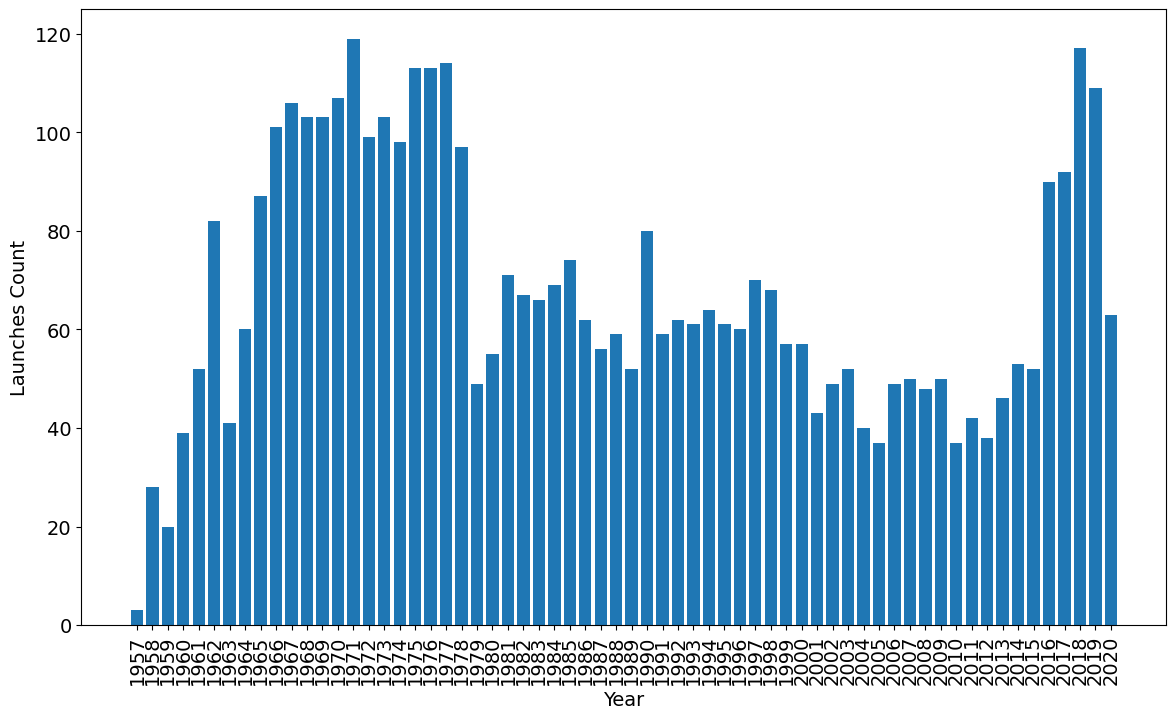

In [218]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Launches Count', fontsize=14)
plt.xlabel('Year', fontsize=14)
 
plt.bar(num_of_launches_per_year.Year,num_of_launches_per_year.Detail)

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [219]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [220]:
Month = []
for i in df_data_clean.Date:
    Month.append(i[4:7])
Month

['Aug',
 'Aug',
 'Aug',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',


In [221]:
df_data_clean["Month"] = Month

In [222]:
df_data_clean

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,China,2020,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA,2020,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan,2020,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958,Feb
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958,Feb
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957,Dec
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957,Nov


In [223]:
launches_per_month = df_data_clean.groupby("Month",as_index=False).agg({"Detail":"count"})
launches_per_month

,Month,Detail
0,Apr,383
1,Aug,373
2,Dec,450
3,Feb,336
4,Jan,268
5,Jul,351
6,Jun,402
7,Mar,353
8,May,326
9,Nov,336


In [224]:
bar = px.bar(x = launches_per_month.Month, y = launches_per_month.Detail,title='Number of Launches per Month',color_continuous_scale='Agsunset',hover_name=launches_per_month.Detail,color=launches_per_month.Detail)
 
bar.update_layout(xaxis_title='Month',yaxis_title='Launches Count',coloraxis_showscale=False)
 
bar.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [225]:
launch_price_over_time = df_data_clean.groupby("Year",as_index=False).agg({"Price":"sum"})
launch_price_over_time

,Year,Price
0,1957,150.00
1,1958,"1,400.00"
2,1959,"1,000.00"
3,1960,"1,950.00"
4,1961,"2,600.00"
...,...,...
59,2016,"6,385.27"
60,2017,"5,886.41"
61,2018,"7,147.98"
62,2019,"6,151.51"


In [226]:
line = px.line(launch_price_over_time, 
               x='Year', 
               y='Price',
               title='Launch Price varied Over Time')
 
line.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [227]:
num_of_over_time_per_org = df_data_clean.groupby(["Organisation","Year"],as_index=False).agg({"Detail":"count"})
num_of_over_time_per_org_sort = num_of_over_time_per_org.sort_values(by="Detail",ascending=False)
top_10_org = num_of_over_time_per_org_sort[:80]
top_10_org

,Organisation,Year,Detail
517,RVSN USSR,1977,97
516,RVSN USSR,1976,95
511,RVSN USSR,1971,93
515,RVSN USSR,1975,89
510,RVSN USSR,1970,87
...,...,...,...
60,Boeing,1992,11
58,Boeing,1990,11
23,Arianespace,1995,11
589,ULA,2012,10


In [228]:
top_10_org = top_10_org.sort_values(by="Year")
top_10_org

,Organisation,Year,Detail
624,US Navy,1958,12
600,US Air Force,1960,21
601,US Air Force,1961,23
420,NASA,1961,12
167,General Dynamics,1962,14
...,...,...,...
547,Roscosmos,2019,13
580,SpaceX,2019,13
120,CASC,2019,27
581,SpaceX,2020,14


In [229]:
line = px.line(top_10_org, 
               x='Year', 
               y='Detail',
               color='Organisation',
               title='Number of Launch varied Over Time by Organisation')
 
line.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [277]:
df_data_clean.Year = df_data_clean.Year.astype(int)

In [278]:
usa_and_ussr = df_data_clean[(df_data_clean["Country_Codes"]=="USA") | (df_data_clean["Country_Codes"]=="RUS") | (df_data_clean["Country_Codes"]=="KAZ")]
usa_and_ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,50.00,Success,USA,USA,2020,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,Kazakhstan,2020,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,Jul
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,KAZ,Kazakhstan,2020,Jul
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958,Feb
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958,Feb
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957,Dec
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957,Nov


In [279]:
usa_and_ussr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3486 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    3486 non-null   object 
 1   Location        3486 non-null   object 
 2   Date            3486 non-null   object 
 3   Detail          3486 non-null   object 
 4   Rocket_Status   3486 non-null   object 
 5   Price           3486 non-null   float64
 6   Mission_Status  3486 non-null   object 
 7   Country_Codes   3486 non-null   object 
 8   Country_Names   3486 non-null   object 
 9   Year            3486 non-null   int32  
 10  Month           3486 non-null   object 
dtypes: float64(1), int32(1), object(9)
memory usage: 313.2+ KB


In [280]:
usa_and_ussr = usa_and_ussr[usa_and_ussr["Year"] <= 1991]
usa_and_ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year,Month
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,50.00,Success,KAZ,Kazakhstan,1991,Dec
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,50.00,Success,RUS,Russian Federation,1991,Dec
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,50.00,Success,USA,USA,1991,Dec
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,50.00,Success,USA,USA,1991,Nov
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russian Feder...","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,50.00,Success,RUS,Russian Federation,1991,Nov
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958,Feb
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958,Feb
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957,Dec
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957,Nov


In [281]:
USAvsUSSR = []
for i in usa_and_ussr.Country_Names:
    i = i.replace("Russian Federation","USSR")
    i = i.replace("Kazakhstan","USSR")
    USAvsUSSR.append(i)
usa_and_ussr["USAvsUSSR"] = USAvsUSSR

C:\Users\aezhi\AppData\Local\Temp\ipykernel_9532\1983647050.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [282]:
usa_and_ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year,Month,USAvsUSSR
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,50.00,Success,KAZ,Kazakhstan,1991,Dec,USSR
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russian Federa...","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,50.00,Success,RUS,Russian Federation,1991,Dec,USSR
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,50.00,Success,USA,USA,1991,Dec,USA
1722,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Thu Nov 28, 1991 13:23 UTC",Atlas-E/F Star-37S-ISS | DMSP F-11,StatusRetired,50.00,Success,USA,USA,1991,Nov,USA
1723,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russian Feder...","Wed Nov 27, 1991 03:30 UTC",Cosmos-3M (11K65M) | Cosmos 2173,StatusRetired,50.00,Success,RUS,Russian Federation,1991,Nov,USSR
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958,Feb,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,50.00,Success,USA,USA,1958,Feb,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,50.00,Failure,USA,USA,1957,Dec,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,50.00,Success,KAZ,Kazakhstan,1957,Nov,USSR


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [283]:
usa_and_ussr_grp = usa_and_ussr.groupby("USAvsUSSR").agg({"Detail":"count"})
usa_and_ussr_grp

,Detail
USAvsUSSR,
USA,662
USSR,1770


In [284]:
usa_and_ussr_chart = px.pie(labels=usa_and_ussr_grp.index,names=usa_and_ussr_grp.index,values=usa_and_ussr_grp.Detail,title="Total Number of Launches of the USSR and USA")
            
usa_and_ussr_chart.update_traces(textposition='outside', textinfo='percent+label')
 
usa_and_ussr_chart.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [285]:
usa_and_ussr_grp_year = usa_and_ussr.groupby(["Year","USAvsUSSR"],as_index=False).agg({"Detail":"count"})
usa_and_ussr_grp_year

,Year,USAvsUSSR,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
65,1989,USSR,26
66,1990,USA,26
67,1990,USSR,37
68,1991,USA,18


In [286]:
line = px.line(usa_and_ussr_grp_year, 
               x='Year', 
               y='Detail',
               color='USAvsUSSR',
               title='Number of Launch varied Over Time(Year) by USA vs USSR')
 
line.show()

## Chart the Total Number of Mission Failures Year on Year.

In [325]:
failed_missions = df_data_clean[df_data_clean["Mission_Status"] != "Success"]
failed_missions

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country_Codes,Country_Names,Year,Month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.30,Failure,CHN,China,2020,Jul
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.50,Failure,NZL,New Zealand,2020,Jul
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.00,Failure,USA,USA,2020,May
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,China,2020,Apr
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,50.00,Failure,CHN,China,2020,Mar
...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,50.00,Failure,USA,USA,1958,Apr
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,50.00,Failure,KAZ,Kazakhstan,1958,Apr
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,50.00,Failure,USA,USA,1958,Mar
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,50.00,Failure,USA,USA,1958,Feb


In [326]:
chart_failed_mission = failed_missions.groupby("Year",as_index=False).agg({"Detail":"count"})
chart_failed_mission

,Year,Detail
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


In [327]:
line = px.line(chart_failed_mission, 
               x='Year', 
               y='Detail',
               title='Total Number of Failed Launches over time (Year) ')
 
line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [367]:
percentage_of_failures = failed_missions.groupby("Year",as_index=False).agg({"Detail":"count"})
percentage_of_failures

,Year,Detail
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


In [378]:
row,col = failed_missions.shape

In [379]:
percentage_of_failures["Failures_Percent"] = percentage_of_failures["Detail"]/ row
percentage_of_failures

,Year,Detail,Failures_Percent
0,1957,1,0.00
1,1958,22,0.05
2,1959,12,0.03
3,1960,20,0.04
4,1961,20,0.04
...,...,...,...
59,2016,4,0.01
60,2017,8,0.02
61,2018,4,0.01
62,2019,9,0.02


In [370]:
grouped_df_failures = percentage_of_failures.set_index("Year")
grouped_df_failures

,Detail,Failures_Percent
Year,,
1957,1,0.00
1958,22,0.05
1959,12,0.03
1960,20,0.04
1961,20,0.04
...,...,...
2016,4,0.01
2017,8,0.02
2018,4,0.01


In [371]:
rolling_df_failures = grouped_df_failures.rolling(window=6).mean()
rolling_df_failures

,Detail,Failures_Percent
Year,,
1957,NaN,NaN
1958,NaN,NaN
1959,NaN,NaN
1960,NaN,NaN
1961,NaN,NaN
...,...,...
2016,3.17,0.01
2017,4.17,0.01
2018,4.17,0.01


C:\Users\aezhi\AppData\Local\Temp\ipykernel_9532\1999411868.py:16: UserWarning:

The label '_child0' of <matplotlib.lines.Line2D object at 0x000001936EC1A450> starts with '_'. It is thus excluded from the legend.



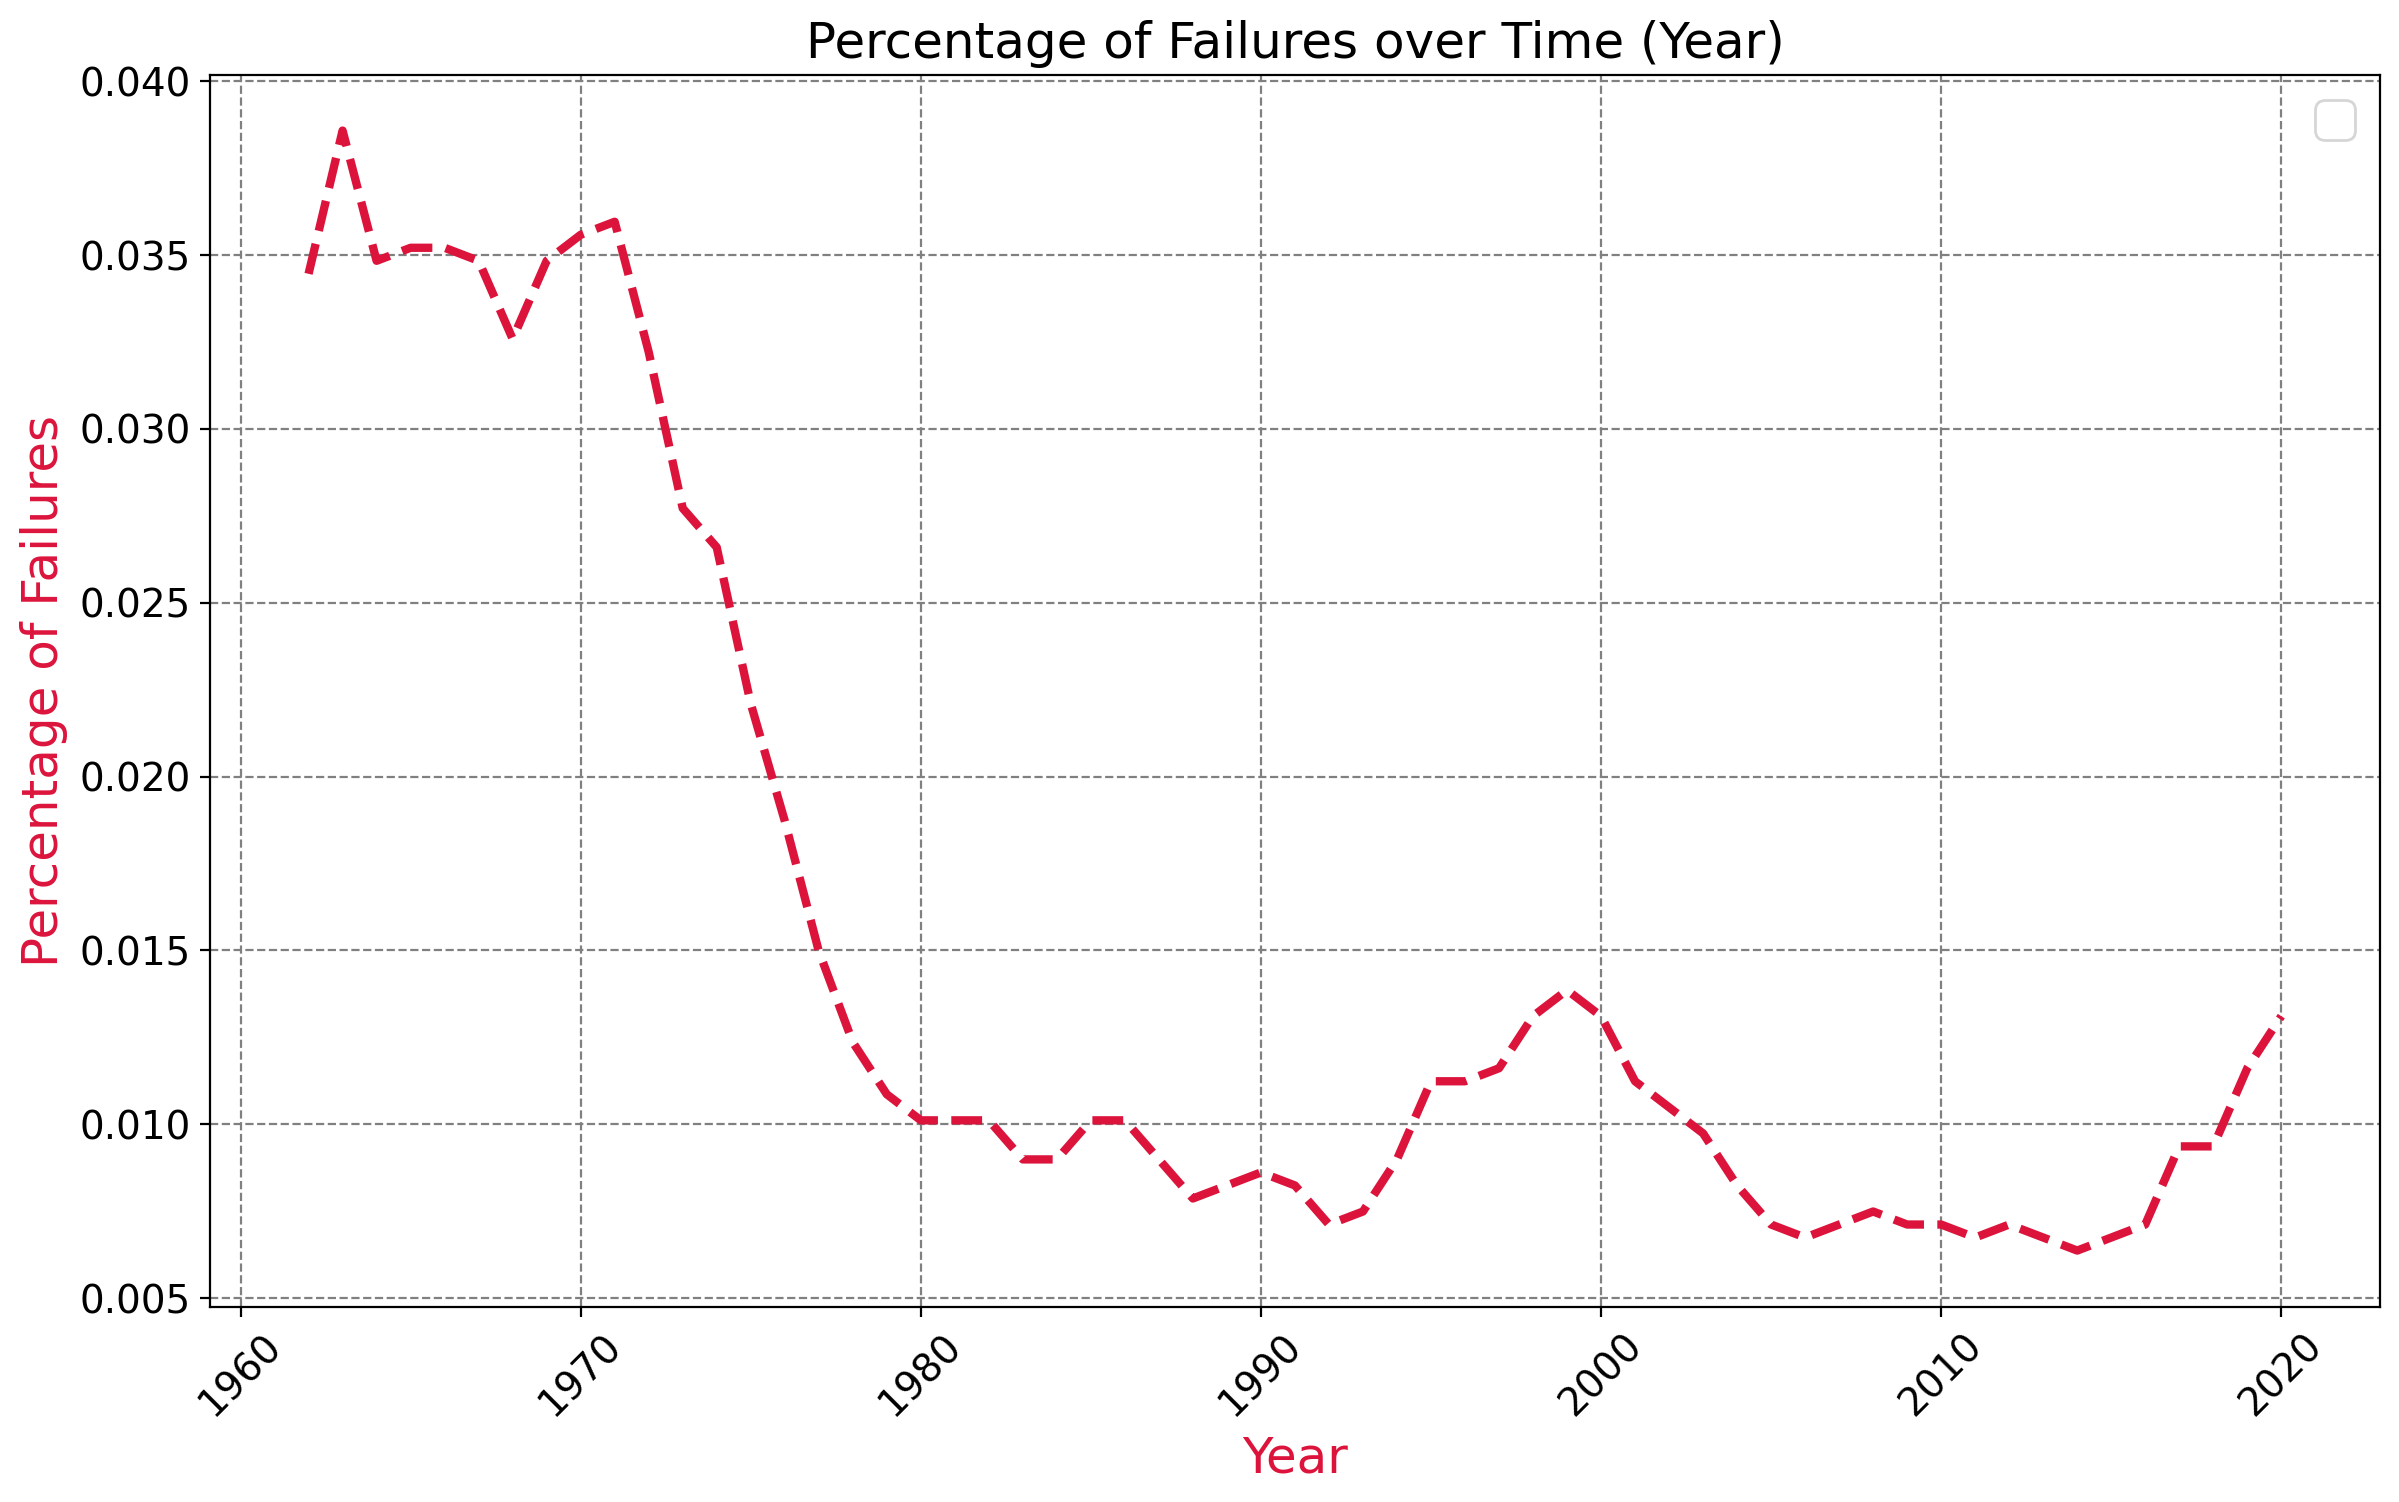

In [384]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Failures over Time (Year)', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.xlabel('Year', color='crimson', fontsize=18)
plt.ylabel('Percentage of Failures', color='crimson', fontsize=18)
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(rolling_df_failures.index, 
                    rolling_df_failures.Failures_Percent, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--')
 
plt.legend(handles=[ma_line],
           fontsize=18)
 
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [321]:
most_launches_per_year_country = df_data_clean.groupby(["Year","Country_Names"],as_index=False).agg({"Detail":"count"})
most_launches_per_year_country = most_launches_per_year_country.sort_values(["Year","Detail"],ascending=False)
most_launches_per_year_country

,Year,Country_Names,Detail
403,2020,China,22
411,2020,USA,21
408,2020,Kazakhstan,6
407,2020,Japan,3
409,2020,New Zealand,3
...,...,...,...
4,1959,Kazakhstan,4
3,1958,USA,23
2,1958,Kazakhstan,5
0,1957,Kazakhstan,2


In [322]:
most_launches_per_year_country_grp = most_launches_per_year_country.groupby("Year").first()
most_launches_per_year_country_grp

,Country_Names,Detail
Year,,
1957,Kazakhstan,2
1958,USA,23
1959,USA,16
1960,USA,30
1961,USA,43
...,...,...
2016,USA,27
2017,USA,30
2018,China,39


In [324]:
bar = px.bar(x = most_launches_per_year_country_grp.index,y = most_launches_per_year_country_grp.Detail,title='Countries Doing the Most Number of Launches',color_continuous_scale='Agsunset',hover_name=most_launches_per_year_country_grp.Country_Names,color=most_launches_per_year_country_grp.Country_Names)
 
bar.update_layout(xaxis_title='Year',yaxis_title='Launches Count',coloraxis_showscale=False)
 
bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [318]:
most_launches_per_year_org = df_data_clean.groupby(["Year","Organisation"],as_index=False).agg({"Detail":"count"})
most_launches_per_year_org = most_launches_per_year_org.sort_values(["Year","Detail"],ascending=False)
most_launches_per_year_org

,Year,Organisation,Detail
649,2020,CASC,19
659,2020,SpaceX,14
648,2020,Arianespace,4
658,2020,Roscosmos,4
660,2020,ULA,4
...,...,...,...
4,1958,RVSN USSR,5
3,1958,NASA,2
5,1958,US Air Force,2
0,1957,RVSN USSR,2


In [319]:
most_launches_per_year_org_grp =  most_launches_per_year_org.groupby("Year").first()
most_launches_per_year_org_grp

,Organisation,Detail
Year,,
1957,RVSN USSR,2
1958,US Navy,12
1959,US Air Force,10
1960,US Air Force,21
1961,US Air Force,23
...,...,...
2016,CASC,22
2017,SpaceX,18
2018,CASC,37


In [320]:
bar = px.bar(x = most_launches_per_year_grp.index,y = most_launches_per_year_grp.Detail,title='Organisation Doing the Most Number of Launches',color_continuous_scale='Agsunset',hover_name=most_launches_per_year_grp.Organisation,color=most_launches_per_year_grp.Organisation)
 
bar.update_layout(xaxis_title='Year',yaxis_title='Launches Count',coloraxis_showscale=False)
 
bar.show()